## Survey of Community Needs

This notebook plots all applicant responses to questions about data and educational needs for the community. It is a useful measure of where each community is starting from.


In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from gspread_pandas import Spread, Client

In [5]:
spread = Spread("SnowExhackweek 2021",sheet=0)
df = spread.sheet_to_df()
df.reset_index(inplace=True)
df.reset_index(inplace=True)
df.Timestamp = pd.to_datetime(df.Timestamp)

/home/arendta/miniconda3/envs/hackweek/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname MDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [28]:
# Create an empty list

Row_list1 =[]
Row_list2 =[]

# create a variable for each column you'd like to plot

col1 = 'Which SnowEx datasets are you most interested in? Please check all that apply.'  
col2 = 'From your perspective, what are the most important data science needs within the SnowEx community?'

for index, rows in df.iterrows():
    # append the list to the final list
    for i in range(len(rows[col1].split(';'))): 
        Row_list1.append(rows[col1].split(';')[i])
    for i in range(len(rows[col2].split(';'))): 
        Row_list2.append(rows[col2].split(';')[i]) 

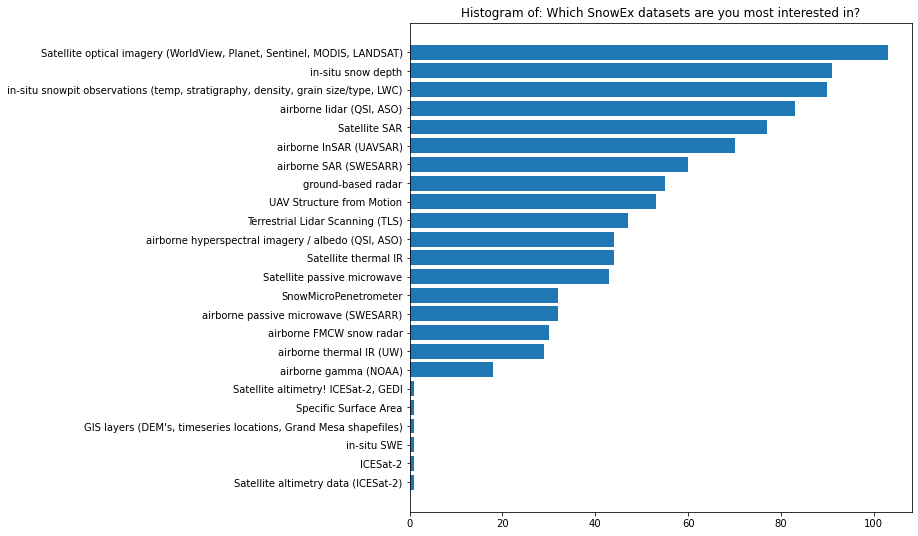

In [15]:
d = dict((i, Row_list1.count(i)) for i in Row_list1)
d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1])}
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 9))
plt.barh(*zip(*d.items()))
plt.title('Histogram of: ' + col1.split('?')[0] + '?')
plt.show()

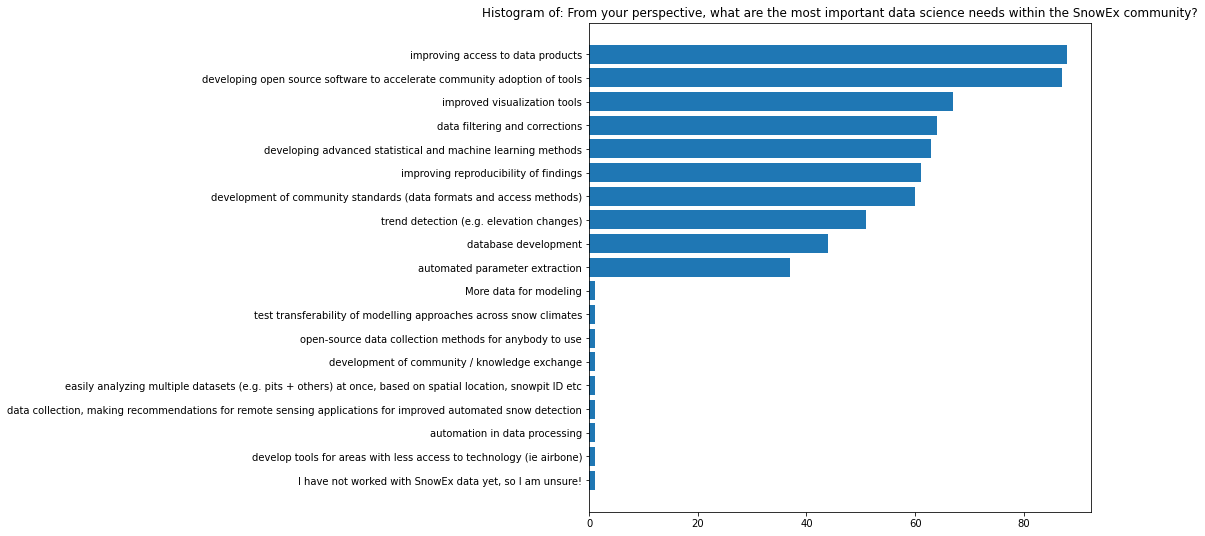

In [17]:
d = dict((i, Row_list2.count(i)) for i in Row_list2)
d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1])}
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 9))
plt.barh(*zip(*d.items()))
plt.title('Histogram of: ' + col2.split('?')[0] + '?')
plt.show()

In [31]:
df[df['If applicable, describe any modeling or model output datasets you are currently working with or interested in for SnowEx sites.']!='']['If applicable, describe any modeling or model output datasets you are currently working with or interested in for SnowEx sites.'].to_csv('modeling.csv')